# Exploratory Data Analysis.

## Necessary prep of the data.

In [1]:
import Pkg
Pkg.add("CSV")
Pkg.add("Plots")
Pkg.add("DataFrames")
Pkg.add("Statistics")
Pkg.add("StatsPlots")

   Updating registry at `~/.julia/registries/General`
######################################################################### 100.0%
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


In [2]:
using Random
using CSV
using Plots
using DataFrames
using Statistics
using LinearAlgebra
using StatsPlots

In [6]:
# prep the data.
df = CSV.read("national.csv")

df = select!(df, Not(:sitename))
df = select!(df, Not(:sitetype))
df = select!(df, Not(:sitetypenum))
df = select!(df, Not(:survyear))
df = select!(df, Not(:weight))
df = select!(df, Not(:stratum))
df = select!(df, Not(:PSU))
df = select!(df, Not(:record))

keep = df[:age].!="NA"
r_df = df[keep, :]
keep = r_df[:grade].!="NA"
r_df = r_df[keep, :]
keep = r_df[:sex].!="NA"
r_df = r_df[keep, :]
keep = r_df[:q41].!=" "
r_df = r_df[keep, :];

In [7]:
r_df = r_df[shuffle(1:end), :]
train_proportion = 0.6
val_proportion = 0.2
n = size(r_df, 1)
println("Size of dataset: ", string(n))

# Put the first ntrain observations in the DataFrame df into the training set, and the rest into the test set
ntrain = convert(Int, round(train_proportion*n))
nval = convert(Int, round(val_proportion*n))

target = r_df[:, :q41]
data = r_df[:, filter(col -> (col != :q41), names(r_df))]

#Now you will split the data to create training and test sets. 

# the following variable records the features of examples in the training set
train_x = data[1:ntrain,:]
val_x = data[ntrain+1:ntrain+nval,:]
# the following variable records the features of examples in the test set
test_x = data[ntrain+nval+1:n,:]
# the following variable records the labels of examples in the training set
train_y = target[1:ntrain,:]
val_y = target[ntrain+1:ntrain+nval,:]
# the following variable records the labels of examples in the test set
test_y = target[ntrain+nval+1:n,:];

Size of dataset: 199642


In [5]:
"This function converts strings to int values.
Strings that cannot be represented as a number (like NA) are converted to zeros"
function string_to_int(str)
    try
        parse(Int, str)
    catch
       0.0
    end
end
"This function converts strings to floating point values.
Strings that cannot be represented as a number (like NA) are converted to zeros"
function string_to_float(str)
    try
        parse(Float64, str)
    catch
       0.0
    end
end
function ages(df)
    for i = 1:size(df,1)
        if df[i, :age] == "1"
            df[i, :age] = "12"
        elseif df[i, :age] == "2"
            df[i, :age] = "13"
        elseif df[i, :age] == "3"
            df[i, :age] = "14"
        elseif df[i, :age] == "4"
            df[i, :age] = "15"
        elseif df[i, :age] == "5"
            df[i, :age] = "16"
        elseif df[i, :age] == "6"
            df[i, :age] = "17"           
        elseif df[i, :age] == "7"
            df[i, :age] = "18"
        end
    end
    df[:age] = string_to_int.(df[:age])
    return df
end
function q41(df)
    for i = 1:size(df,1)
        if df[i] == "1"
            df[i] = "0"
        elseif df[i] == "2"
            df[i] = "1.5"
        elseif df[i] == "3"
            df[i] = "4"
        elseif df[i] == "4"
            df[i] = "7.5"
        elseif df[i] == "5"
            df[i] = "14.5"
        elseif df[i] == "6"
            df[i] = "24.5"           
        elseif df[i] == "7"
            df[i] = "30"
        end
    end
    df = string_to_float.(df)
    return df
end

q41 (generic function with 1 method)

In [8]:
train_x1 = ages(train_x)
test_x1 = ages(test_x)
val_x1 = ages(val_x)

train_y1 = q41(train_y)
test_y1 = q41(test_y)
val_y1 = q41(val_y)

println(size(train_x1))
println(size(train_y1))
data = hcat(train_x1, DataFrame(train_y1));

(119785, 303)
(119785, 1)


## Actual analysis.

In [30]:
function summary_stats(arr)
    clean_arr = skipmissing(arr)
    print("missing: $(mean(ismissing.(arr)))%\n")
    print("maximum: $(maximum(clean_arr))\n")
    print("minimum: $(minimum(clean_arr))\n")
    print("median:  $(median(clean_arr))\n")
    print("mean:    $(mean(clean_arr))\n")
    print("std:     $(std(clean_arr))\n")
end
summary_stats(data[:x1])

missing: 0.0%
maximum: 30.0
minimum: 0.0
median:  0.0
mean:    2.246358058187586
std:     4.7449126617138075


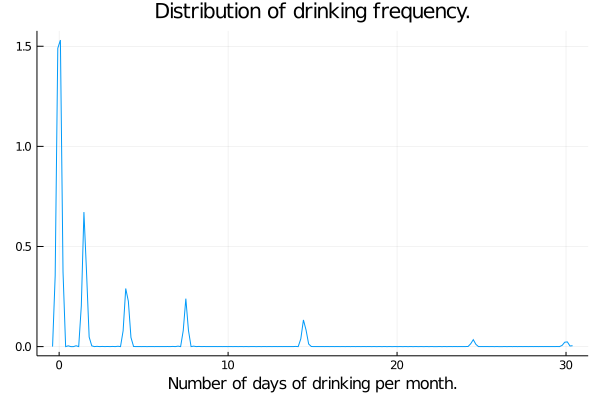

In [10]:
density(train_y1, label = "", title = "Distribution of drinking frequency.")
xlabel!("Number of days of drinking per month.")

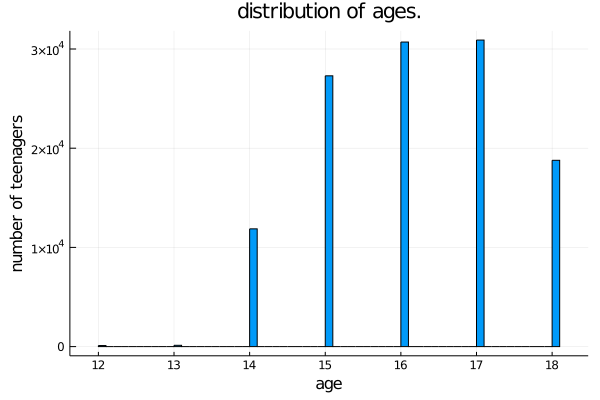

In [12]:
histogram(data[:age], label = "", title = "distribution of ages.")
xlabel!("age")
ylabel!("number of teenagers")

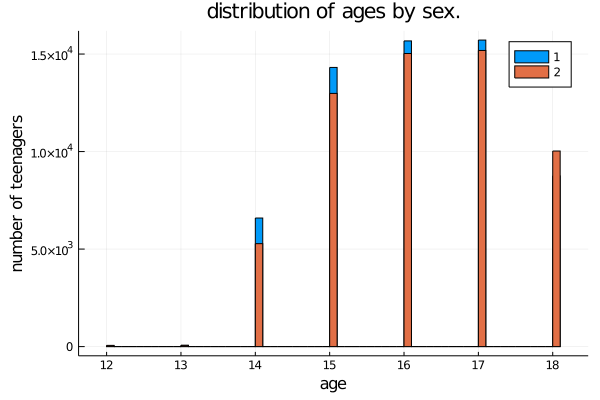

In [39]:
@df data histogram(:age, group = (:sex), title = "distribution of ages by sex.")
xlabel!("age")
ylabel!("number of teenagers")

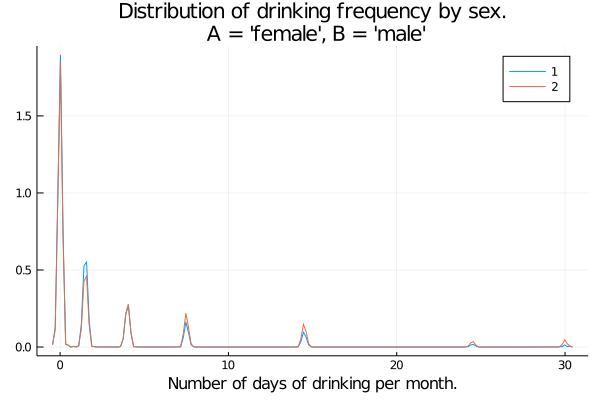

In [13]:
@df data density(:x1, group = (:sex), title = "Distribution of drinking frequency by sex.\n A = 'female', B = 'male'")
xlabel!("Number of days of drinking per month.")

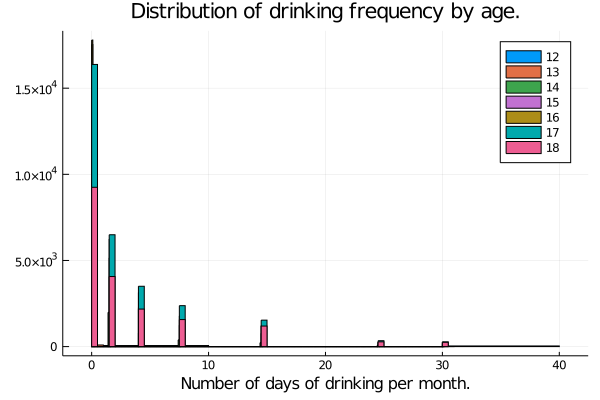

In [14]:
@df data histogram(:x1, group = (:age), title = "Distribution of drinking frequency by age.")
xlabel!("Number of days of drinking per month.")

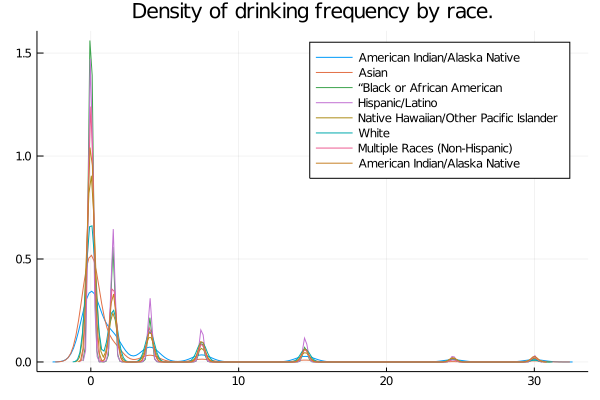

In [29]:
@df data density(:x1, group = (:race7), title = "Density of drinking frequency by race.", label = 
    ["American Indian/Alaska Native" "Asian" "“Black or African American" "Hispanic/Latino" "Native Hawaiian/Other Pacific Islander" "White" "Multiple Races (Non-Hispanic)"])

In [31]:
function q45(df)
    for i = 1:size(df,1)
        if df[i] == "1" || df[i] == " "
            df[i] = "0"
        elseif df[i] == "2"
            df[i] = "1.5"
        elseif df[i] == "3"
            df[i] = "6"
        elseif df[i] == "4"
            df[i] = "14.5"
        elseif df[i] == "5"
            df[i] = "29.5"
        elseif df[i] == "6"
            df[i] = "69.5"           
        elseif df[i] == "7"
            df[i] = "100"
        end
    end
    df = string_to_float.(df)
    return df
end

data[:q45] = q45(data[:q45])

119785-element Array{Float64,1}:
   0.0
   0.0
   0.0
   0.0
  69.5
   0.0
   0.0
  14.5
   6.0
  29.5
  29.5
   0.0
   6.0
   ⋮
  29.5
   0.0
 100.0
  14.5
   0.0
   1.5
   0.0
   0.0
   6.0
  14.5
   0.0
   0.0

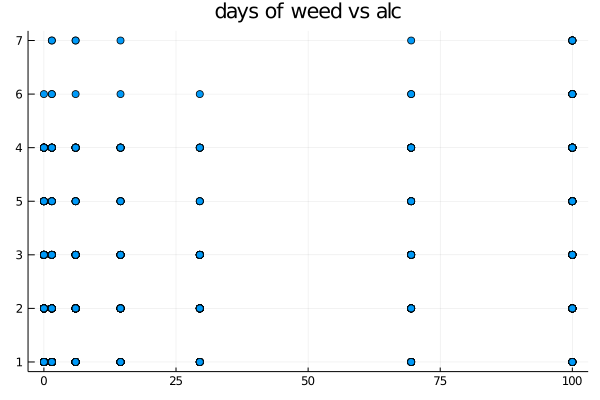

In [37]:
@df data scatter(:q45[1:2000], :q41[1:2000], title = "days of weed vs alc", label = "")